In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from matplotlib.image import imread, imsave

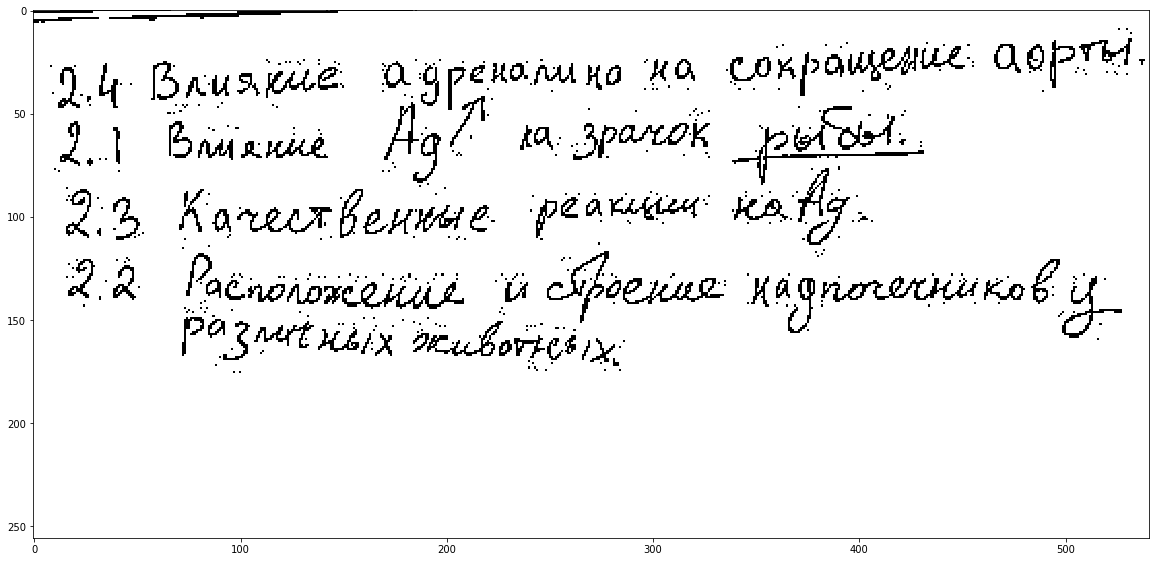

In [33]:
img = cv2.imread('data/cut/vnEwkrYLC3Q.jpg',0)
#img = cv2.medianBlur(img, 3)
th = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, 5)
plt.figure(figsize=(20, 20))
plt.imshow(th, 'gray')

# Горизонтальная гистограмма
x = []
hist_th = 255 - th
for line in hist_th:
    x.append(np.sum(line))

x = np.array(x)
x = x / np.max(x)
#plt.plot(x)
#plt.hist(x, bins=th.shape[0])
#plt.show()

In [34]:
def EPS_function(width):
    return (width ** (2/3)) / 6

541 11.065734849205278
63


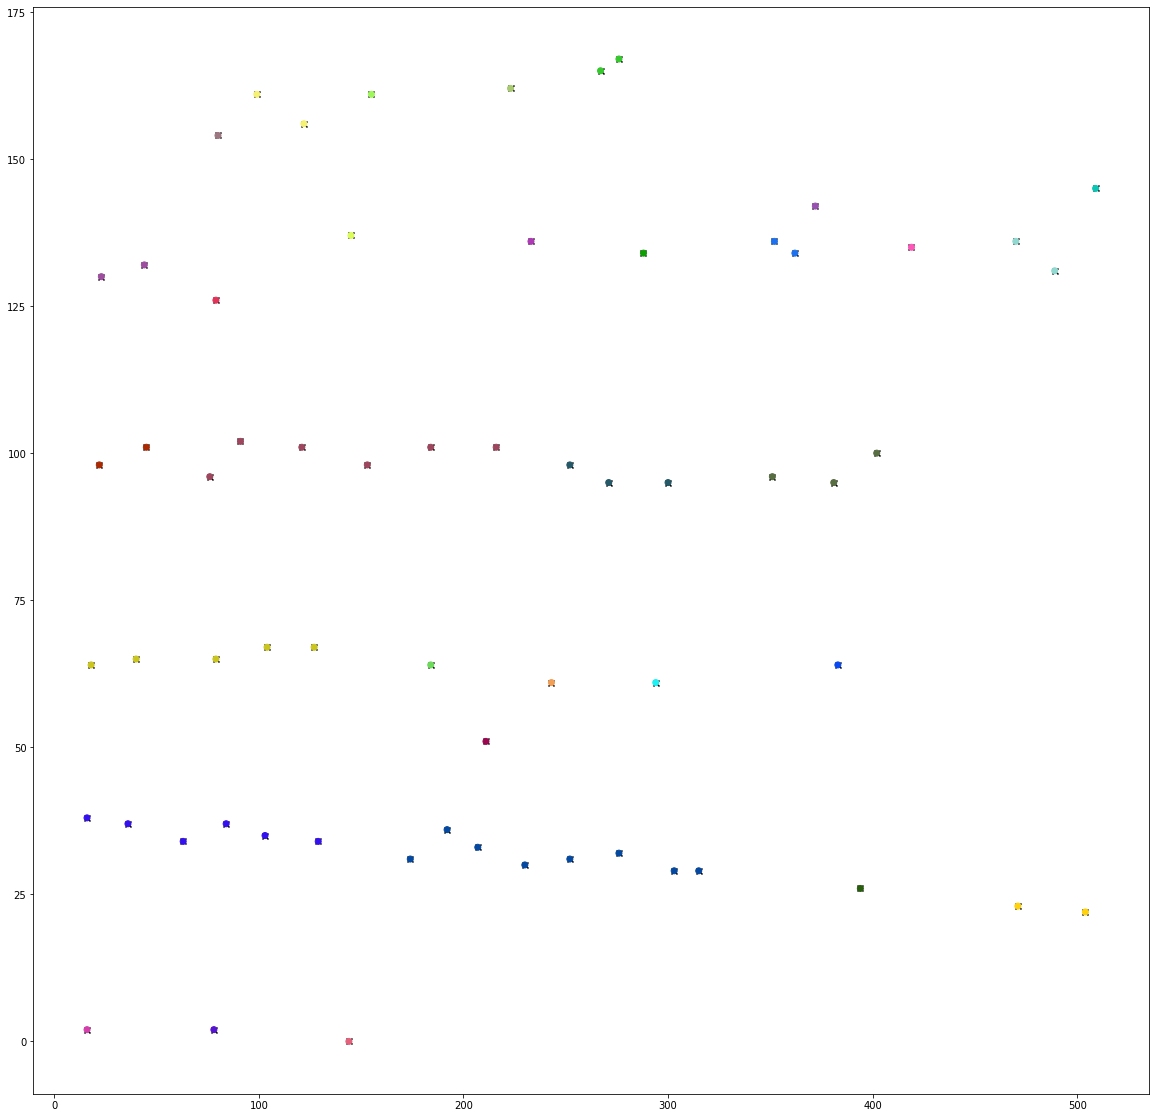

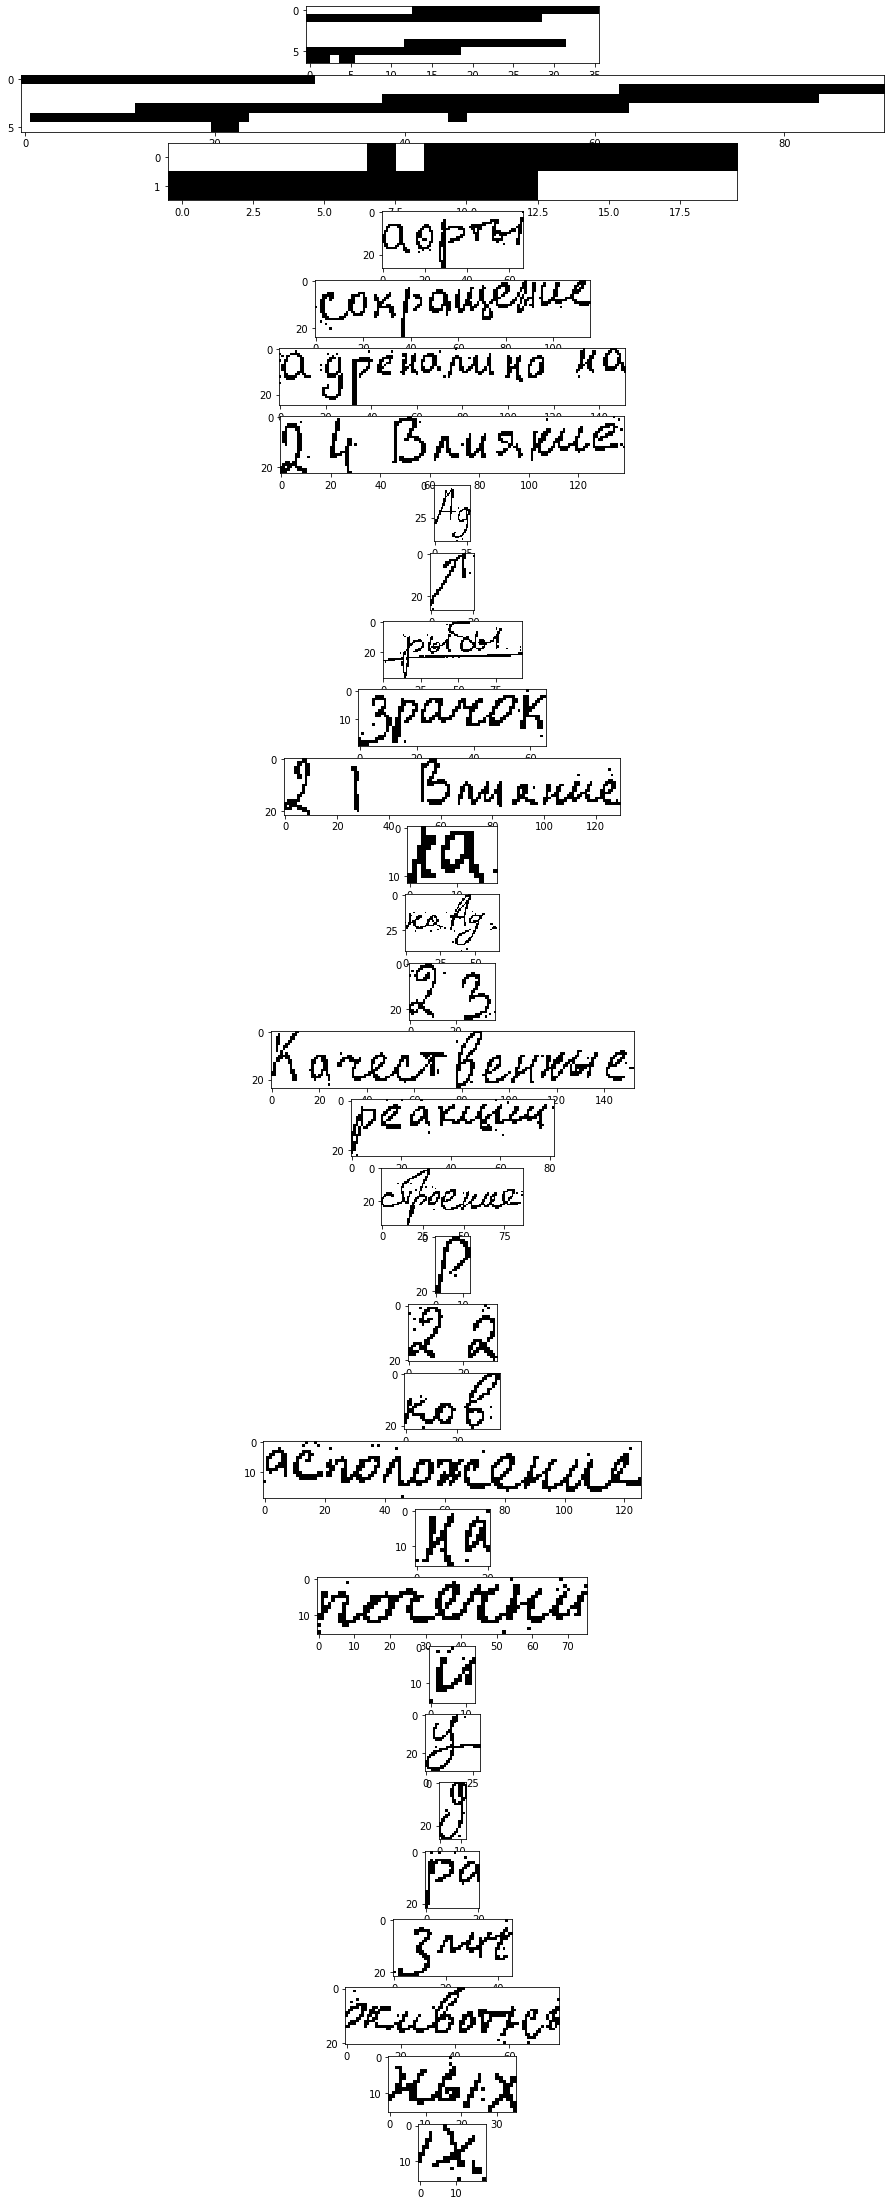

In [52]:
X = []
h, w = th.shape
print(w, EPS_function(w))
for i in range(h):
    for j in range(w):
        if th[i, j] == 0:
            X.append([i, j])
X = np.array(X)

labels = DBSCAN(eps=4, min_samples=10).fit_predict(X)
color_list = np.array([(np.random.rand(), np.random.rand(), np.random.rand()) for i in range(max(labels) + 1)])
print(max(labels))

# Remove noise
Y = []
new_labels = []
for k, x in enumerate(X):
    if labels[k] >= 0:
        new_labels.append(labels[k])
        Y.append(x)
        
new_labels = np.array(new_labels)   
Y = np.array(Y)

plt.figure(figsize=(20, 20))      
#plt.scatter(Y[:, 1], Y[:, 0], c=color_list[new_labels])

# Выделение сегментов
segments_d = {}
for k, l in enumerate(new_labels):
    if l not in segments_d:
        segments_d[l] = []
    segments_d[l].append([Y[k, 0], Y[k, 1]])

# Рассчёт центров
centroids = []
for k in segments_d:
    centroids.append(np.sum(segments_d[k], axis=0) // len(segments_d[k]))
centroids = np.array(centroids)
plt.scatter(centroids[:, 1], centroids[:, 0], c='black', marker='x')

# Повторная кластеризация
labels = DBSCAN(eps=20, min_samples=1).fit_predict(np.array([[x[0] * 3, x[1] / 2] for x in centroids]))
color_list = np.array([(np.random.rand(), np.random.rand(), np.random.rand()) for i in range(max(labels) + 1)])

plt.scatter(centroids[:, 1], centroids[:, 0], c=color_list[labels], marker='o')

# Сегментация
new_segments_d = {}
show = []
new_labels = []
for k, x in enumerate(segments_d):
    if k > 0:
        show = np.append(show, segments_d[x], axis=0)
    else:
        show = segments_d[x]

    if labels[k] not in new_segments_d:
        new_segments_d[labels[k]] = segments_d[x]
    else:
        new_segments_d[labels[k]] = np.append(new_segments_d[labels[k]], segments_d[x], axis=0)

    new_labels = np.append(new_labels, [labels[k] for _ in segments_d[x]])

new_labels = np.array(new_labels, dtype='uint8')
show = np.array(show)
color_list = np.array([(np.random.rand(), np.random.rand(), np.random.rand()) for i in range(max(new_labels) + 1)])
#plt.scatter(show[:, 1], show[:, 0], c=color_list[new_labels])

segments = []
for k in new_segments_d:
    x = np.array(new_segments_d[k])
    off_y, off_x = (min(x[:, 0]), min(x[:, 1]))
    h, w = (max(x[:, 0]) - off_y + 1, max(x[:, 1]) - off_x + 1)
    seg = np.empty((h, w), dtype='uint8')
    seg.fill(255)
    for el in x:
        seg[el[0] - off_y, el[1] - off_x] = 0

    segments.append((seg, ((off_x, off_y), (w + off_x, h + off_y))))

new_th = th.copy()
new_th.fill(255)
new_th[0, 0] = 0
#plt.imshow(new_th, 'gray')
fig, axarr = plt.subplots(nrows=len(segments), ncols=1, sharex=False, figsize=(20, 40))
for k, s in enumerate(segments):
    axarr[k].imshow(s[0], 'gray')
plt.show()

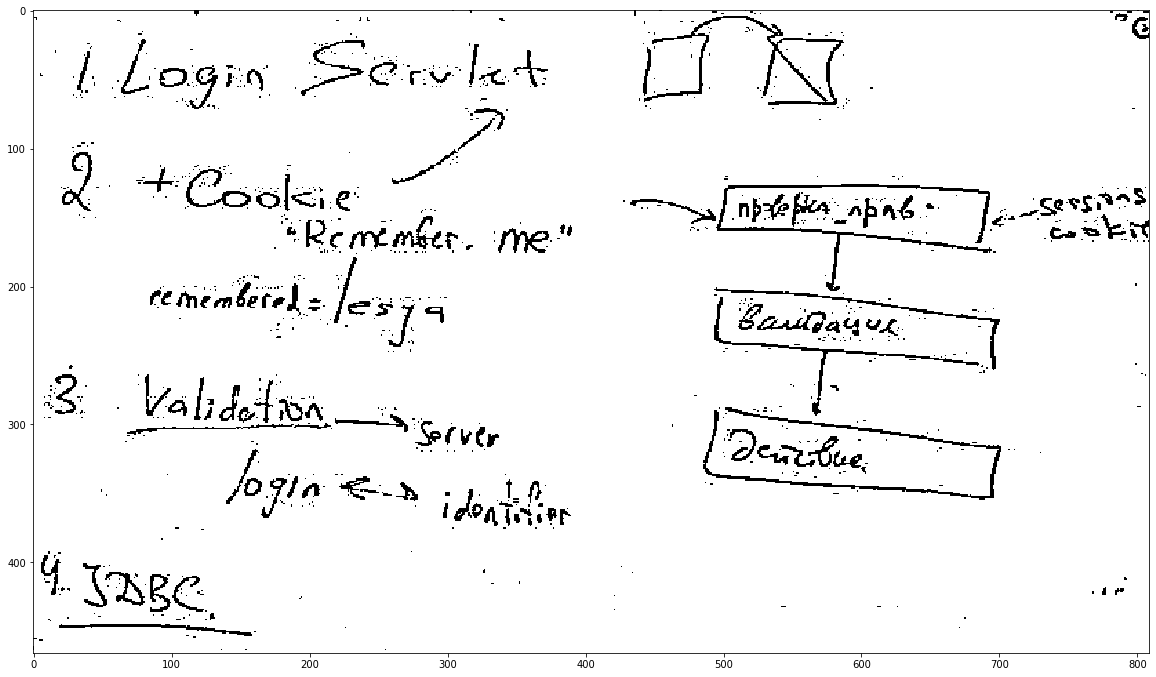

In [28]:
img = cv2.imread('data/cut/photo_2018-09-17_14-18-00.jpg',0)
#img = cv2.medianBlur(img, 3)
th = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, 5)
plt.figure(figsize=(20, 20))
plt.imshow(th, 'gray')

95


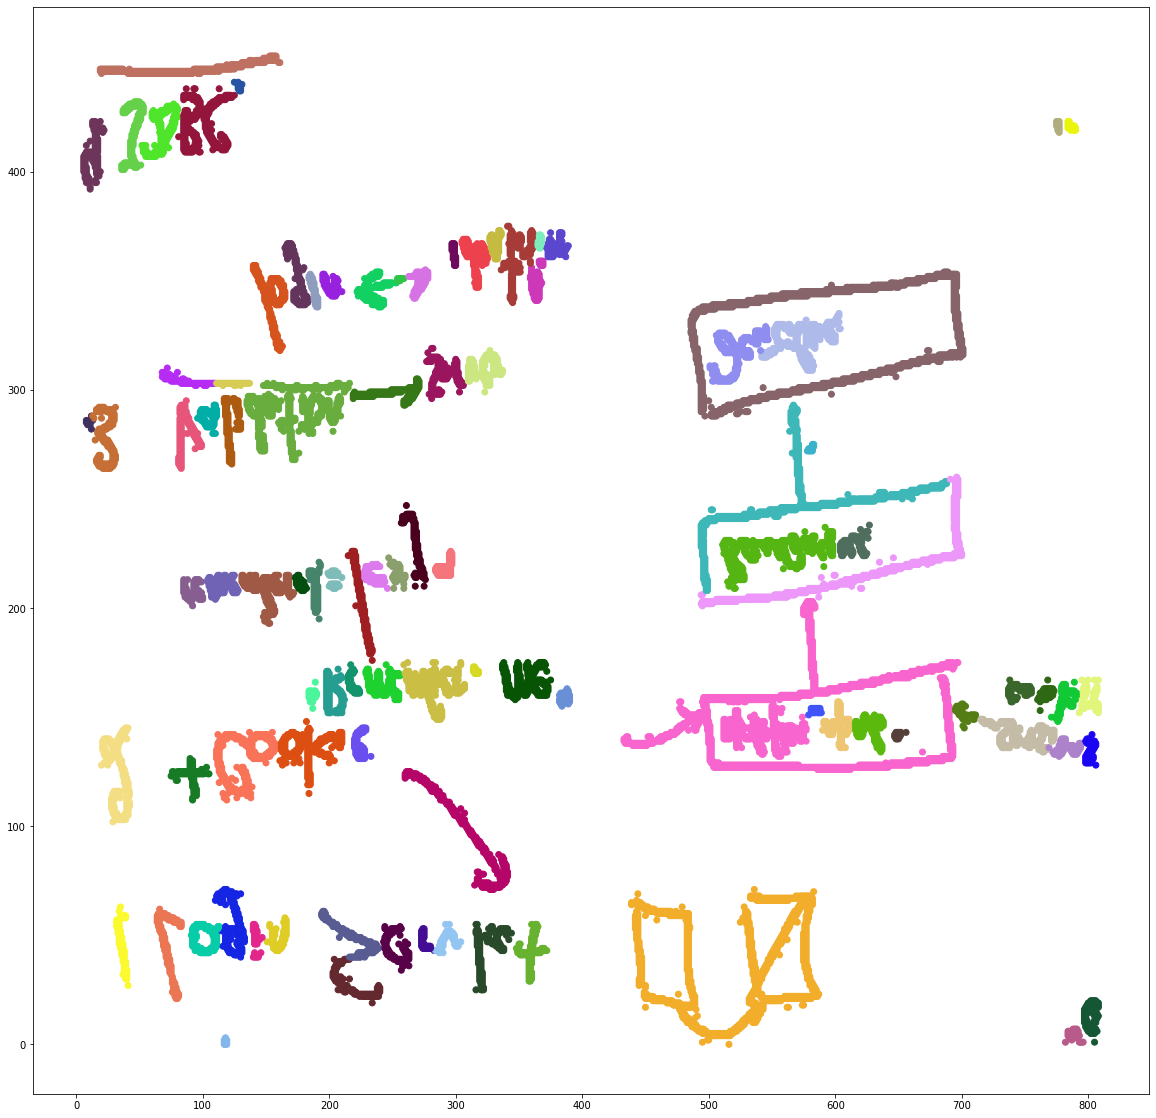

In [138]:
X = []
h, w = th.shape
for i in range(h):
    for j in range(w):
        if th[i, j] == 0:
            X.append([i, j])
X = np.array(X)

labels = DBSCAN(eps=4, min_samples=10).fit_predict(X)
color_list = np.array([(np.random.rand(), np.random.rand(), np.random.rand()) for i in range(max(labels) + 1)])
print(max(labels))

# Remove noise
Y = []
new_labels = []
for k, x in enumerate(X):
    if labels[k] >= 0:
        new_labels.append(labels[k])
        Y.append(x)
        
new_labels = np.array(new_labels)   
Y = np.array(Y)

plt.figure(figsize=(20, 20))      
plt.scatter(Y[:, 1], Y[:, 0], c=color_list[new_labels])

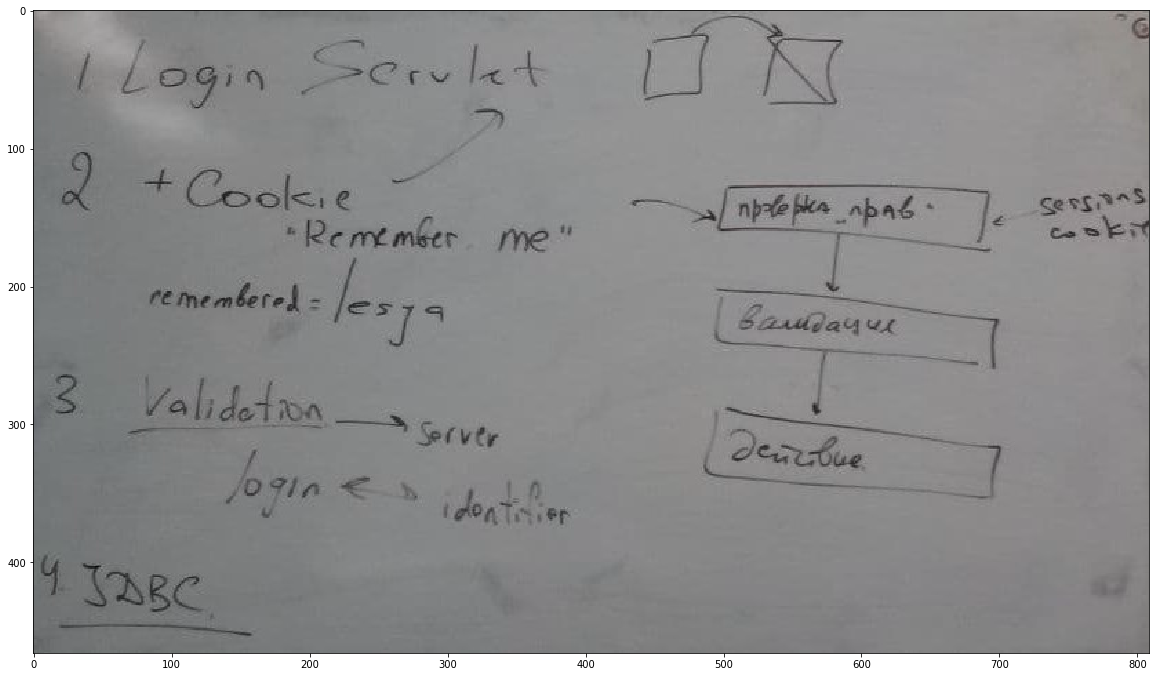

In [10]:
img = cv2.imread('data/cut/photo_2018-09-17_14-18-00.jpg')
plt.figure(figsize=(20, 20))
plt.imshow(img)
img_h, img_w, d = img.shape
X = [[i, j, img[i, j, 0], img[i, j, 1], img[i, j, 2]] for i in range(img_h) for j in range(img_w)]

In [51]:
labels = DBSCAN(eps=5, min_samples=3).fit_predict(X)
color_list = np.array([(np.random.rand(), np.random.rand(), np.random.rand()) for i in range(max(labels) + 1)])
print(max(labels))

# Remove noise
Y = []
new_labels = []
for k, x in enumerate(X):
    if labels[k] >= 0:
        new_labels.append(labels[k])
        Y.append(x)
        
new_labels = np.array(new_labels)   
Y = np.array(Y)

print(new_labels, new_labels.shape)

1750
[0 0 0 ... 0 0 0] (371831,)


In [56]:
def calculate_avg_colors(img, slic):
    avg = {}
    img_h, img_w, d = img.shape
    for i in range(img_h):
        for j in range(img_w):
            if slic[i, j] in avg:
                avg[slic[i, j]] = np.array([np.sum([avg[slic[i, j]][0], img[i, j]], axis=0), avg[slic[i, j]][1] + 1])
            else:
                avg[slic[i, j]] = np.array([img[i, j], 1])
    
    for k in avg:
        n = avg[k][1]
        avg[k] = np.array([avg[k][0][0] / n, avg[k][0][1] / n, avg[k][0][2] / n])
    
    return avg

In [57]:
def generate_colors(img, labels):
    color_list = np.array([[np.random.rand() * 255, np.random.rand() * 255, np.random.rand() * 255] for i in range(max(labels) + 1)])
    h, w, d = img.shape
    labels = labels.reshape((h, w))
    for i in range(h):
        for j in range(w):
            img[i, j] = color_list[labels[i, j]]
    
    return img

In [58]:
clone = img.copy()
img = generate_colors(clone, labels)

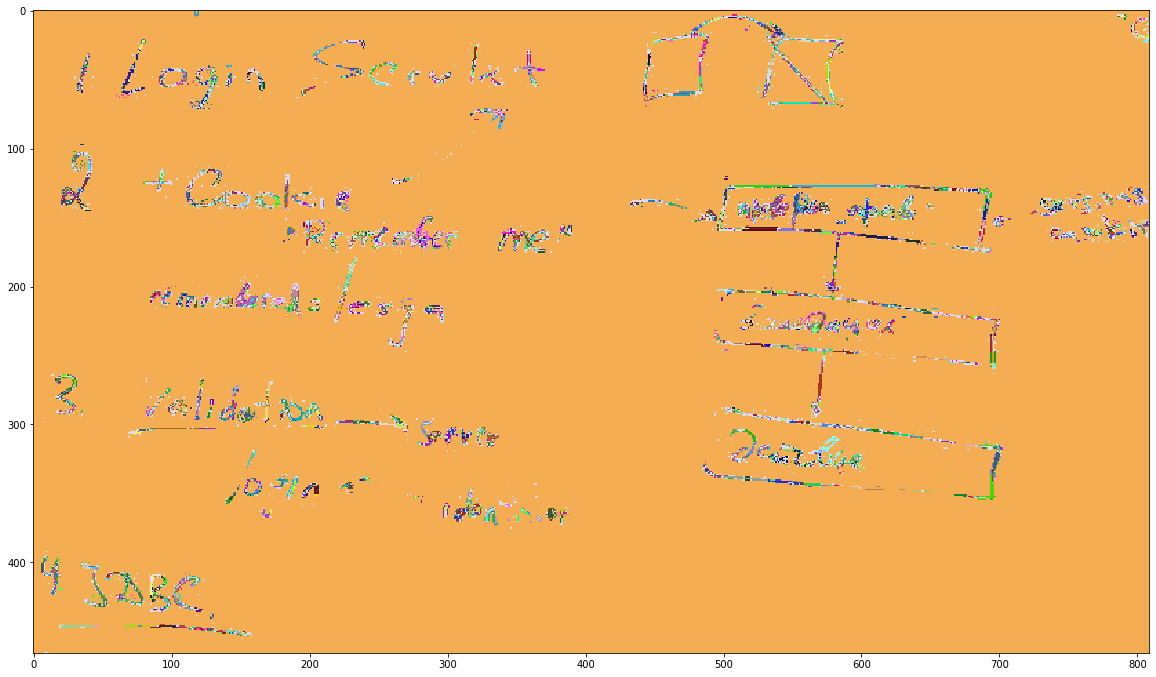

In [59]:
plt.figure(figsize=(20, 20))
plt.imshow(clone)

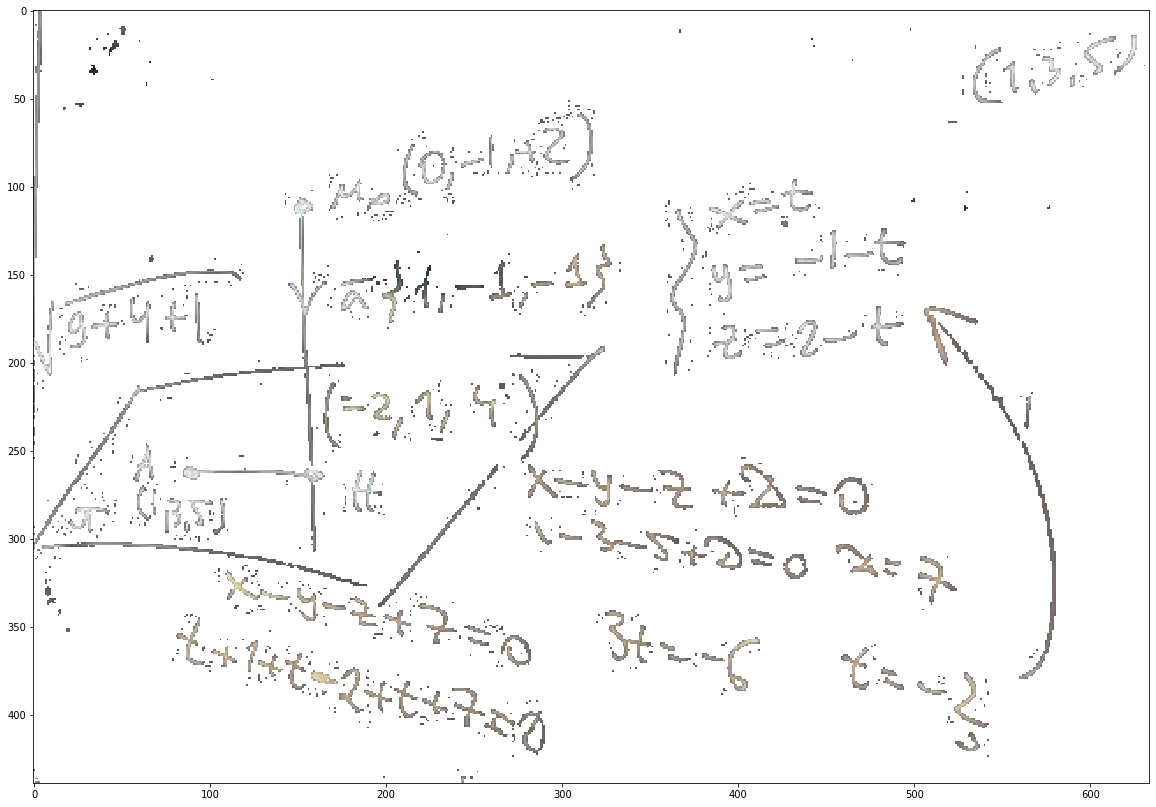

In [19]:
img = cv2.imread('data/cut/photo_2018-05-10_14-28-37.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
inv_mask = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, 5)
mask = 255 - inv_mask
res = cv2.bitwise_and(img, img, mask = mask)
res = 255 - res
plt.figure(figsize=(20, 20))
plt.imshow(res, 'gray')

74


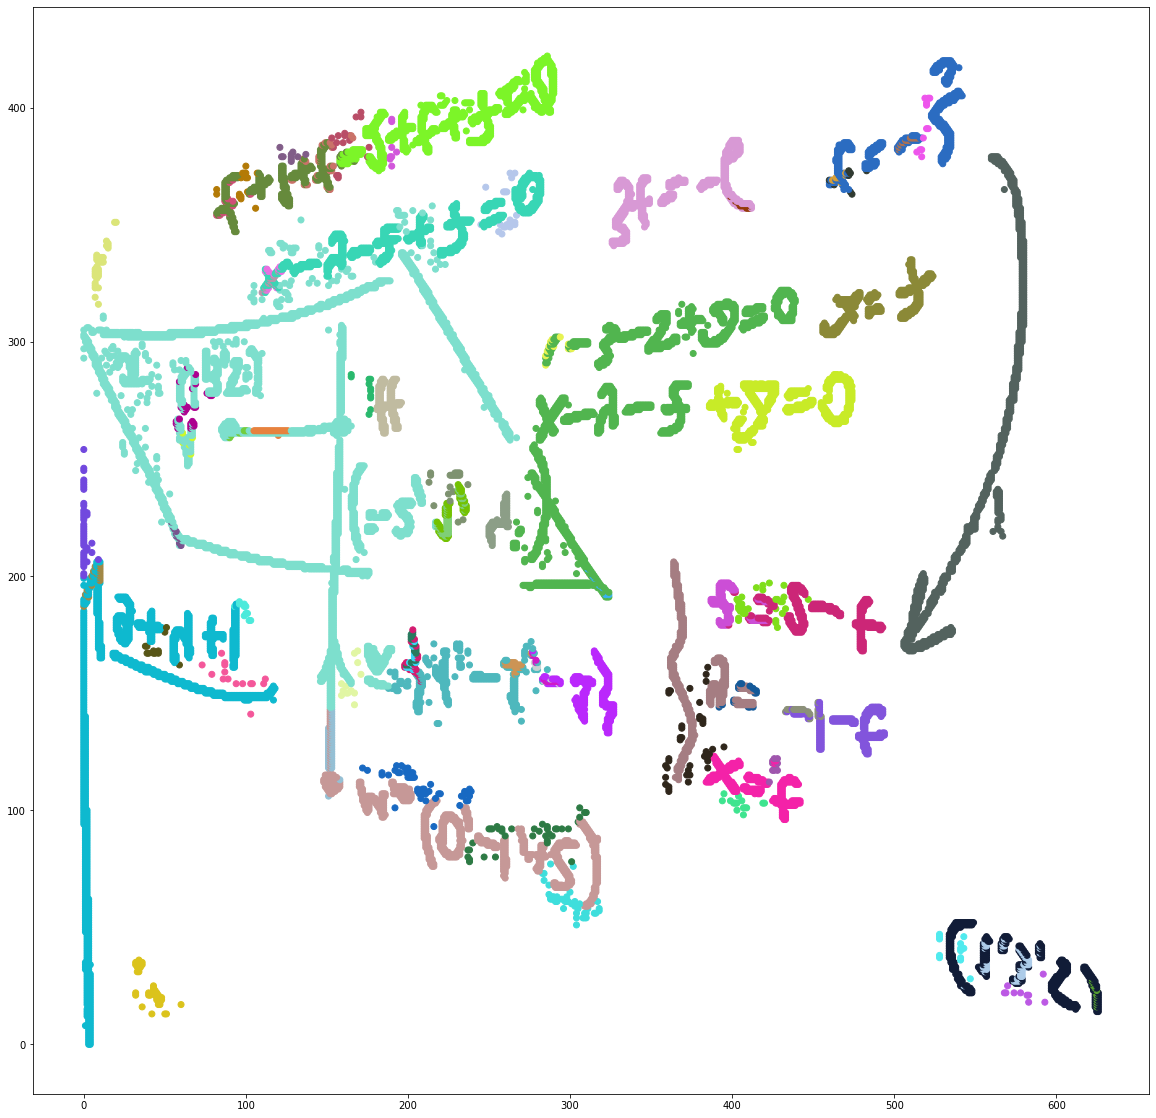

In [24]:
X = []
h, w, _ = res.shape
for i in range(h):
    for j in range(w):
        if sum(res[i, j]) < 255 * 3:
            X.append([i, j, res[i, j, 0], res[i, j, 1], res[i, j, 2]])
X = np.array(X)

labels = DBSCAN(eps=15, min_samples=10).fit_predict(X)
color_list = np.array([(np.random.rand(), np.random.rand(), np.random.rand()) for i in range(max(labels) + 1)])
print(max(labels))

# Remove noise
Y = []
new_labels = []
for k, x in enumerate(X):
    if labels[k] >= 0:
        new_labels.append(labels[k])
        Y.append(x)
        
new_labels = np.array(new_labels)   
Y = np.array(Y)

plt.figure(figsize=(20, 20))      
plt.scatter(Y[:, 1], Y[:, 0], c=color_list[new_labels])